<br><br>
<font size='6'><b>Regression Examples</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>


# 1. De-noising Signal

We start with a signal represented by a vector $x \in \mathbb{R}^n$. The coefficients $x_i$ correspond to the value of some function of time, evaluated (or _sampled_, in the language of signal processing) at evenly spaced points. It is usually assumed that the signal does not vary too rapidly, which means that usually, we have $x_i \approx x_{i+1}$.

Suppose we have a signal $x$, which does not vary too rapidly and that $x$ is corrupted by some small, rapidly varying noise $v$,
i.e. $x_{cor} = x + \upsilon$. 

Then if we want to reconstruct $x$ from $x_{cor}$ we should solve (with $\hat{x}$ as the parameter)

$$ \text{minimize} \quad \lVert \hat{x} - x_{cor}\rVert_2 + \lambda\sum_{i=1}^{n-1}(x_{i+1}-x_i)^2 $$

where the parameter $\lambda$ controls the ''smoothnes'' of $\hat{x}$.

Source:
- Boyd & Vandenberghe's book "[Convex Optimization](http://stanford.edu/~boyd/cvxbook/)"
- http://cvxr.com/cvx/examples/ (Figures 6.8-6.10: Quadratic smoothing)
- Week 4 of Linear and Integer Programming by [Coursera](https://www.coursera.org/) of Univ. of Colorado

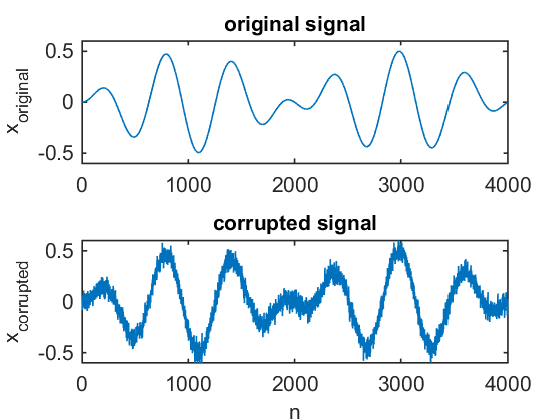

In [1]:
% generate a corrupted time signal
randn('state',0);

n = 4000; t = (0:n-1)';
exact = 0.5*sin((2*pi/n)*t).*sin(0.01*t);
corrupt = exact + 0.05*randn(size(exact));

% to plot
figure(1),  clf
subplot(211);   plot(t,exact,'-');
axis([0 n -0.6 0.6])
title('original signal','fontsize',10);
ylabel('x_{original}','fontsize',10);

subplot(212);   plot(t,corrupt,'-');
axis([0 n -0.6 0.6])
xlabel('n','fontsize',10);
ylabel('x_{corrupted}','fontsize',10);
title('corrupted signal','fontsize',10);

## 1.1. Transform de-noising in time into an optimization problem

<br>
$$\large \min\limits_{X}\;\left\{\underbrace{\lVert(X - X_{cor})\rVert^2_{2}}_{\text{how much } x \text{ deviates from }x_{cor}} + \mu \underbrace{\sum_{k = 1}^{n-1}(x_{k+1}-x_{k})^2}_{\text{penalize rapid changes of } X}\right\}$$

<br>

1) $\min\limits_{X}\;\lVert(X - X_{cor})\rVert^2_{2}$: $\quad$ How much $X$ deviates from $X_{cor}$

2) $\mu\sum\limits_{k = 1}^{n-1}(x_{k+1}-x_{k})^2$: $\quad$ penalize rapid changes of $X$
    
3) $\mu$ : to adjust the relative weight of 1) & 2)

$$X =
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
$$

1) $X - X_{cor} = I_n X - X_{cor}$

2) $\sum\;(x_{k+1}-x_{k})^2 \implies$

$$(x_{2} - x_{1}) - 0 = 
\begin{bmatrix}
-1,&1,&0,&\cdots&0
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}-0
$$

$$(x_{3} - x_{2}) - 0 = 
\begin{bmatrix}
0,&-1,&1,&\cdots&0
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}-0
$$

$$
\vdots
$$

$$\implies
\left \Arrowvert \;
\begin{bmatrix}
-1&1&0&\cdots&0&0 \\
0&-1&1&\cdots&0&0 \\
\vdots&\vdots&\vdots&\ddots&\vdots&\vdots\\
0&0&0&\cdots&-1&1
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
-
\begin{bmatrix}
0 \\
0 \\
\vdots \\
0
\end{bmatrix} \;
\right\Arrowvert^2_{2}
$$

$$\hspace{3.2cm}D \quad\quad\quad\quad\quad\quad X \; \; - \; \; 0 $$

<br>

$$\begin{align*} \left\Vert I_n X-X_{cor}\big\Vert^2_{2} + \mu\big\Vert DX-0\right\Vert^2_{2}
& = \big\Vert Ax-b\big\Vert^2_{2} \\
& = \Bigg\Vert 
\begin{bmatrix}
I_n\\
\sqrt{\mu}D
\end{bmatrix}
X-
\begin{bmatrix}
X_{cor}\\
0
\end{bmatrix}
\Bigg\Vert^2_{2}
\end{align*}$$

$$ \text{where} \; 
A =  
\begin{bmatrix}
I_n\\
\sqrt{\mu}D
\end{bmatrix},\quad
b = 
\begin{bmatrix}
X_{cor}\\
0
\end{bmatrix}
$$


- Then, plug $A$, $b$ into Matlab with `cvx` toolbox to numerically solve

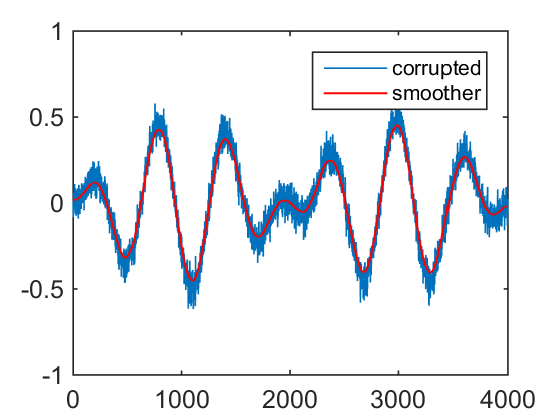

In [2]:
D = sparse(n-1,n);
D(:,1:n-1) = -speye(n-1);
D(:,2:n) = D(:,2:n) + speye(n-1);

mu = 1000;

A = [speye(n);
     sqrt(mu)*D];

b = [corrupt;
     zeros(n-1,1)];

sol = inv(A'*A)*A'*b;

figure(2)
plot(t,corrupt,'-');    hold on
plot(t,sol,'r','linewidth',1);  hold off
set(gca,'fontsize',12)
leg = legend('corrupted','smoother');
set(leg,'fontsize',10)

## 1.2. with different $\mu$'s (see how $\mu$ affects smoothing results)


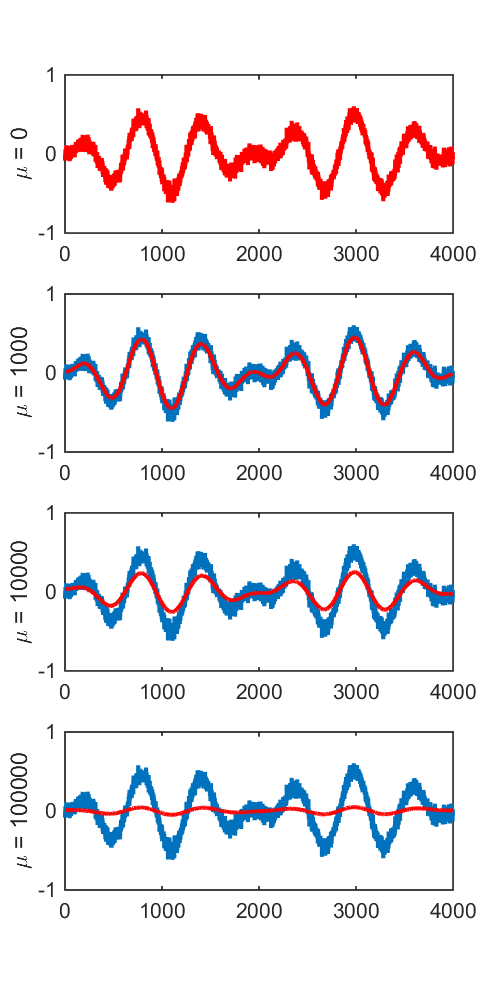

In [3]:
%plot -s 500,1000
mu = [0 1000 1e4 1e5];

figure(3),  clf
for i = 1:length(mu)
    A = [speye(n);
         sqrt(mu(i))*D];

    b = [corrupt;
         zeros(n-1,1)];

    sol = inv(A'*A)*A'*b;
    subplot(4,1,i), plot(t,corrupt,'-',t,sol,'r','linewidth',2)
    ylabel(['\mu = ',num2str(mu(i))])
end

## 1.3. use CVX
- CVX strongly encourages to eliminate quadratic forms - that is, functions like sum_square, sum(square(.)) or quad_form - whenever it is possible to construct equivalent models using norm instead

$$ \min\; \left\{ \lVert x-x_{cor}\rVert_2^2 + \mu \lVert Dx \rVert_2^2 \right\}$$

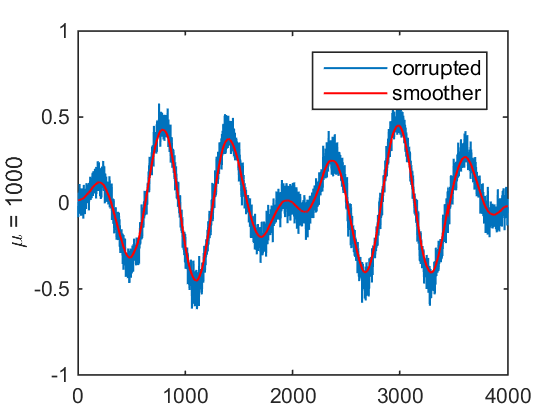

In [4]:
%plot -s 560,420
clear x

n = 4000;
mu = 1000;

cvx_begin quiet
    variable x(n)
    minimize(square_pos(norm(x-corrupt,2)) + mu*square_pos(norm(x(2:n)-x(1:n-1),2)))
cvx_end

plot(t,corrupt,'-',t,x,'r','linewidth',1)
ylabel(['\mu = ',num2str(mu)])

leg = legend('corrupted','smoother');
set(leg,'fontsize',10)

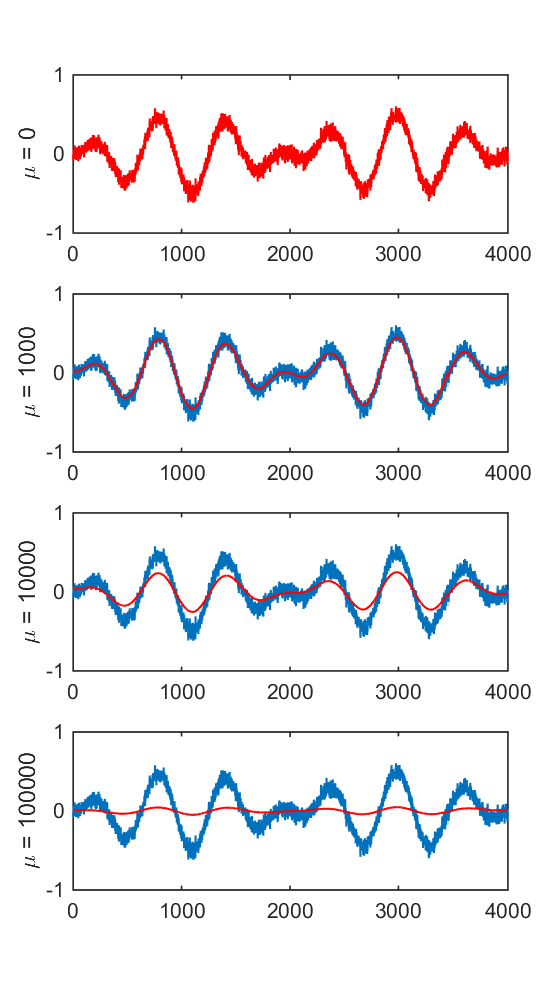

In [5]:
%plot -s 560,1000
clear x
mu = [0 1000 1e4 1e5];
figure(4),  clf
for i = 1:length(mu)
    cvx_begin quiet
        variable x(n)
        minimize(square_pos(norm(x-corrupt,2)) + mu(i)*square_pos(norm(x(2:n)-x(1:n-1),2)))
    cvx_end
    subplot(4,1,i), plot(t,corrupt,'-',t,x,'r','linewidth',1)
    ylabel(['\mu = ',num2str(mu(i))])
end

## 1.4. $L_2$ norm

$$ \min \; \left\{ \lVert x-x_{cor}\rVert_2 + \alpha \lVert Dx ~ \rVert_2 \right \}$$

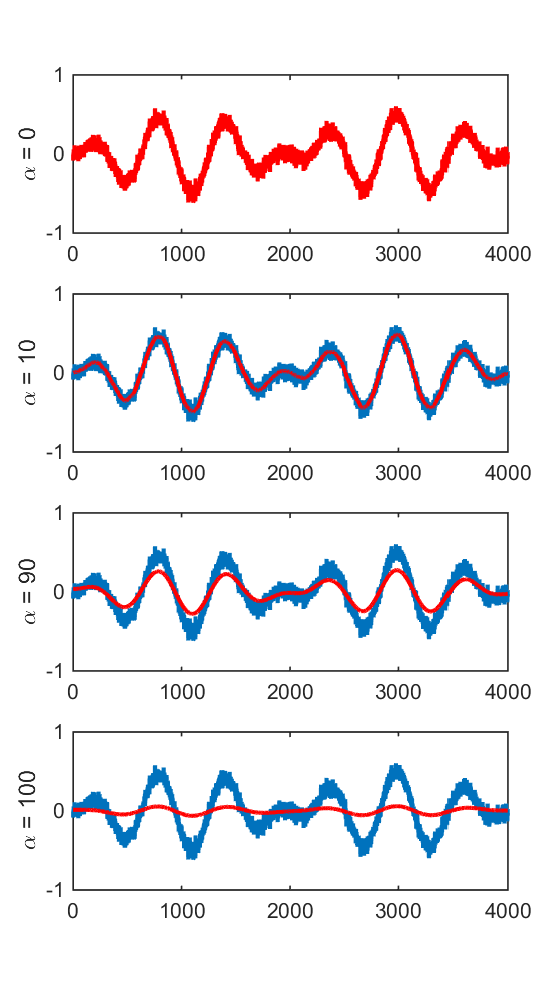

In [6]:
%plot -s 560,1000
clear x
alpha = [0 10 90 100];
figure(5),  clf
for i = 1:length(alpha)
    cvx_begin quiet
        variable x(n)
        minimize(norm(x-corrupt,2) + alpha(i)*norm(x(2:n)-x(1:n-1),2))
    cvx_end
    subplot(length(alpha),1,i), plot(t,corrupt,'-',t,x,'r','linewidth',2)
    ylabel(['\alpha = ',num2str(alpha(i))])
end

## 1.5. $L_2$ norm with a constraint
$$\min \; \lVert Dx \rVert_2$$
 
$$ s.t. \quad \lVert x-x_{cor} \rVert_2 < \beta $$

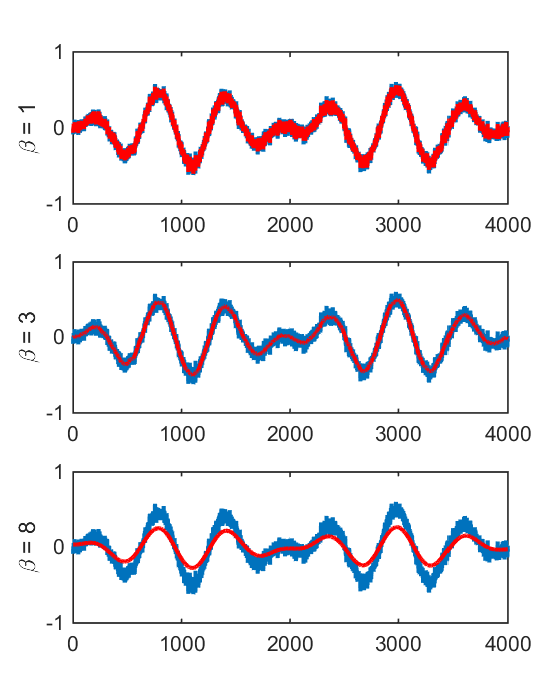

In [7]:
%plot -s 560,700

clear x
beta = [1 3 8];
figure(6),  clf
for i = 1:length(beta)
    cvx_begin quiet
        variable x(n)
        minimize(norm(x(2:n)-x(1:n-1),2))
        subject to
            norm(x-corrupt,2) <= beta(i);
    cvx_end
    subplot(length(beta),1,i), plot(t,corrupt,'-',t,x,'r','linewidth',2)
    ylabel(['\beta = ',num2str(beta(i))])
end

# 2. Signal with Sharp Transition + Noise

Suppose we have a signal $x$, which is mostly smooth, but has several rapid variations (or jumps). If we apply quadratic smoothing on this signal (see SMOOTHREC_CVX) then in order to remove the noise we will not be able to preserve the signal's sharp transitions.


- First, apply the same method that we used for smoothing signals before
- known as a _total variation problem_
- Source:
    - Chapter 6.3 from Boyd & Vandenberghe's book "[Convex Optimization](http://stanford.edu/~boyd/cvxbook/)"
    - m-files of [total variation reconstruction](http://cvxr.com/cvx/examples/cvxbook/Ch06_approx_fitting/html/tv_cvx.html)


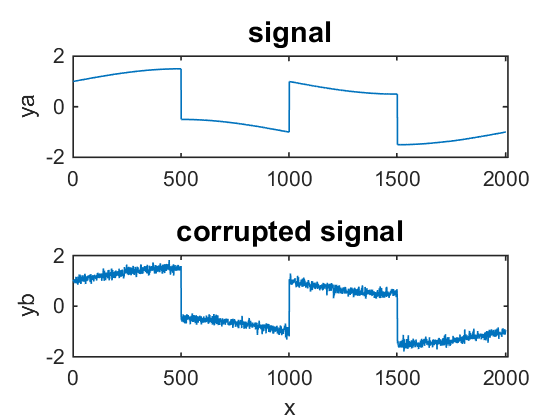

In [8]:
%plot -s 560,420
%% Generate corrupted singal with sharp transition
n = 2000;   % length of signal
t = 0:n;
t = t(:);

figure(1)

temp = ones(ceil((n+1)/4),1);
exact= [temp; -temp; temp; -temp];
x = exact(1:n+1) + 0.5*sin((2*pi/n)*t);
exact_variation = sum(abs(exact(2:(n+1)) - exact(1:n)));

subplot(211),   plot(t,x,'-');
axis([0 n+10 -2 2]);
ylabel('ya');   title('signal','fontsize',14);

%
noise = 0.1*randn(size(t));
corrupt = x + noise;
noisy_variation = sum(abs(corrupt(2:(n+1)) - corrupt(1:n)));

subplot(212),   plot(t,corrupt,'-');
axis([0 n+10 -2 2]);
ylabel('yb');   xlabel('x');    title('corrupted signal','fontsize',14);

## Quadratic Smoothing ($L_2$ norm)

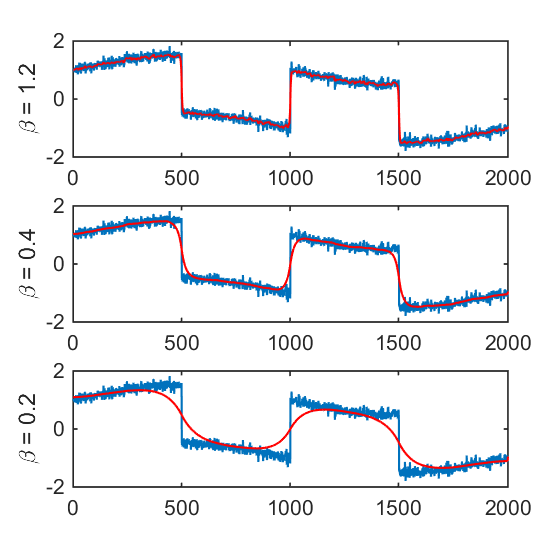

In [9]:
%plot -s 560,550
%% CVX norm L2 with norm L2 constraints
clear x
beta = [1.2 0.4 0.2];
figure(2),  clf

for i = 1:length(beta)    
    cvx_begin quiet
        variable x(n+1)
        minimize (norm(x-corrupt,2))
        subject to
            norm(x(2:n)-x(1:n-1),2) <= beta(i);
    cvx_end
    subplot(length(beta),1,i), plot(t,corrupt,t,x,'r','linewidth',1)
    ylabel(['\beta = ',num2str(beta(i))])    
end

- Quadratic smoothing smooths out _noise and sharp transitions_ in signal, but this is not what we want

- Any ideas ?

## $L_1$ Norm

We can instead apply total variation reconstruction on the signal by solving

$$\min \; \lVert x - x_{cor} \rVert_2 + \lambda \sum_{i=1}^{n-1} \;\lvert x_{i+1}-x_i \rvert $$

where the parameter lambda controls the ''smoothness'' of $x$.

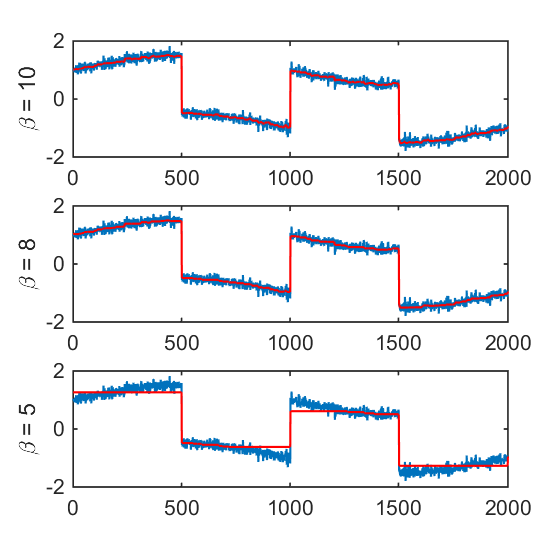

In [10]:
%plot -s 560,550

%% CVX norm L2 with norm L1 constraints

clear x
beta = [10 8 5];
figure(3),  clf

for i = 1:length(beta)    
    cvx_begin quiet
        variable x(n+1)
        minimize(norm(x-corrupt,2))
        subject to
            norm(x(2:n)-x(1:n-1),1) <= beta(i);             
    cvx_end
    subplot(length(beta),1,i), plot(t,corrupt,t,x,'r','linewidth',1)
    ylabel(['\beta = ',num2str(beta(i))])    
end

- Total variation smoothing preserves sharp transitions in signal, and this is not bad

- Note how TV reconstruction does a better job of preserving the sharp transitions in the signal while removing the noise.


# 3. Total Variation Image Reconstruction

- idea comes from [here](http://www2.compute.dtu.dk/~pcha/mxTV/)

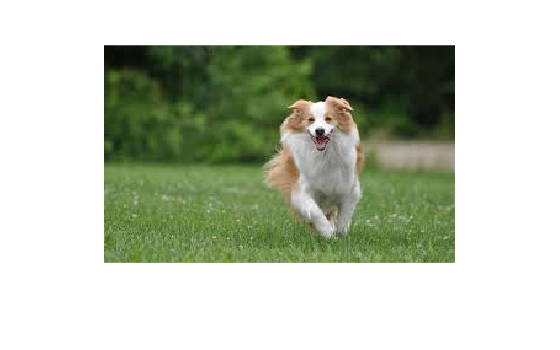

In [1]:
%plot -s 560,350
%% image load
im = imread([pwd,'\data_files\dog.jpg']);
figure(1),  clf
imshow(im)

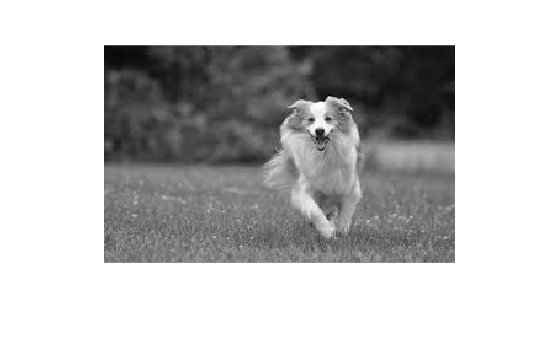

In [12]:
%plot -s 560,350
imbw = rgb2gray(im);
figure(2),  clf
imshow(imbw)

- Question: Apply $L_1$ norm to image, and guess what kind of an image will be produced ? 

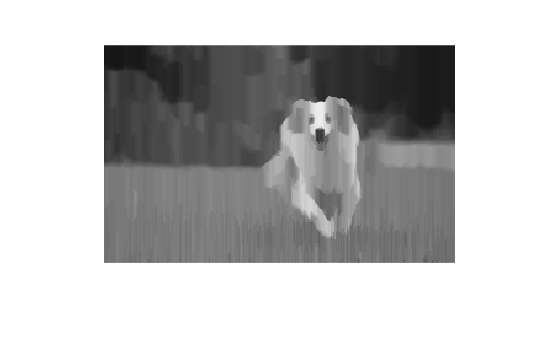

In [13]:
%plot -s 560,350

%% image reconstruction

[row,col] = size(imbw);

n = row*col;

imbws = reshape(imbw,n,1);
imbwd = double(imbws);

beta = 70000;
cvx_begin quiet
    variable x(n,1)
    minimize (norm(x-imbwd,2))
    subject to
        norm(x(2:n)-x(1:n-1),1) <= beta;
cvx_end

imbwr = reshape(x,row,col);

figure(3),  clf
imshow(uint8(imbwr))

- Cartoonish effect

# 4. Electric Power Consumption vs. Temperature

Data from [Seoul Open Data Plaza](http://data.seoul.go.kr/index.jsp)

In [14]:
[num_eletric,txt1] = xlsread([pwd,'\data_files\Excel_total.xls']);
[num_temperature,txt2] = xlsread([pwd,'\data_files\Excel_temp.xls']);

x = num_temperature(:,1);
y = num_eletric(:);
y = y/1000000;

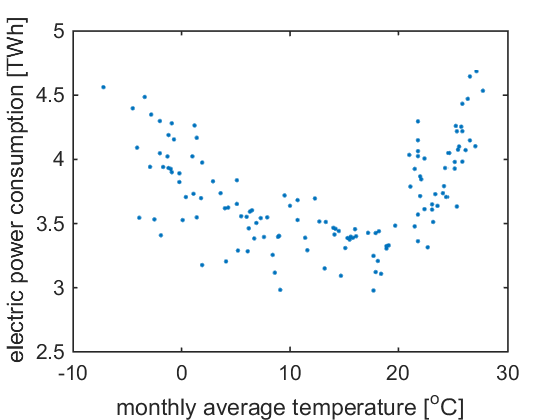

In [15]:
%plot -s 560,420
plot(x,y,'.')
xlabel('monthly average temperature [^oC]')
ylabel('electric power consumption [TWh]')

## Polynomial functions

$$
\hat{y} = \theta_1 + \theta_2 x + \theta_3 x^2 + \cdots
$$

$$\phi(x) = \begin{bmatrix} 1 \\ x\\x^2 \\\vdots\end{bmatrix}$$

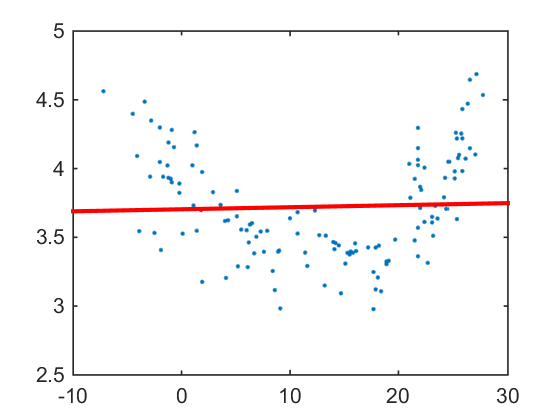

In [16]:
m = length(x);

xp = -10:0.1:30;
xp = xp(:);

d = 1;

Phi = [];
polybasis = [];

for i = 0:d
    Phi = [Phi x.^i];
    polybasis = [polybasis xp.^i];
end

theta = inv(Phi'*Phi)*Phi'*y;
yp = polybasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r','linewidth',2);  hold off

RSS = [];
yhat = Phi*theta;
RSS = [RSS norm(y-yhat,2)];

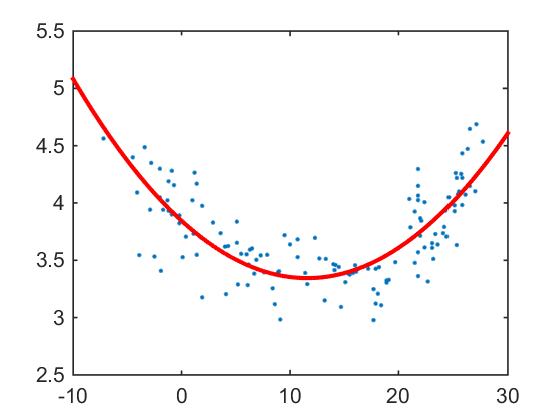

In [17]:
d = 2;

Phi = [];
polybasis = [];

for i = 0:d
    Phi = [Phi x.^i];
    polybasis = [polybasis xp.^i];
end

theta = inv(Phi'*Phi)*Phi'*y;
yp = polybasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r','linewidth',2);  hold off

e = [];
yhat = Phi*theta;
RSS = [RSS norm(y-yhat,2)];

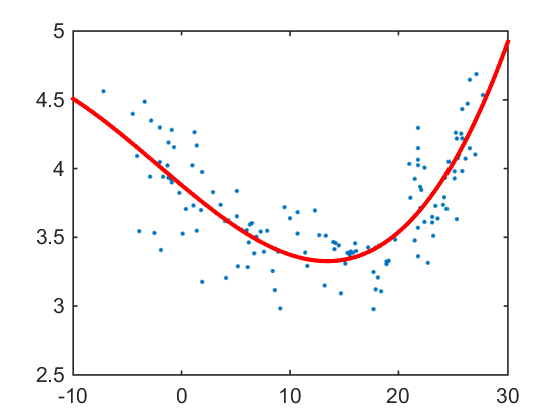

In [18]:
d = 3;

Phi = [];
polybasis = [];

for i = 0:d
    Phi = [Phi x.^i];
    polybasis = [polybasis xp.^i];
end

theta = inv(Phi'*Phi)*Phi'*y;
yp = polybasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r','linewidth',2);  hold off

yhat = Phi*theta;
RSS = [RSS norm(y-yhat,2)];

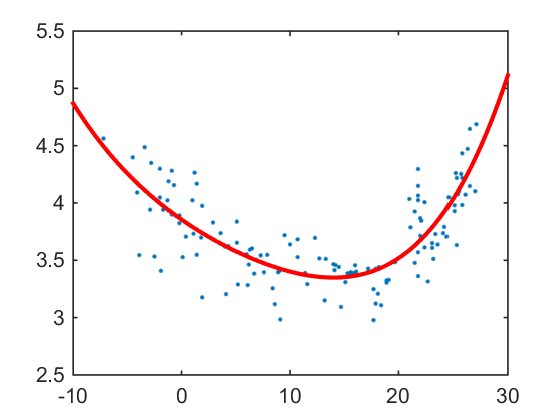

In [19]:
d = 4;

Phi = [];
polybasis = [];

for i = 0:d
    Phi = [Phi x.^i];
    polybasis = [polybasis xp.^i];
end

theta = inv(Phi'*Phi)*Phi'*y;
yp = polybasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r','linewidth',2);  hold off

yhat = Phi*theta;
RSS = [RSS norm(y-yhat,2)];

Question: How to decide a proper $d$

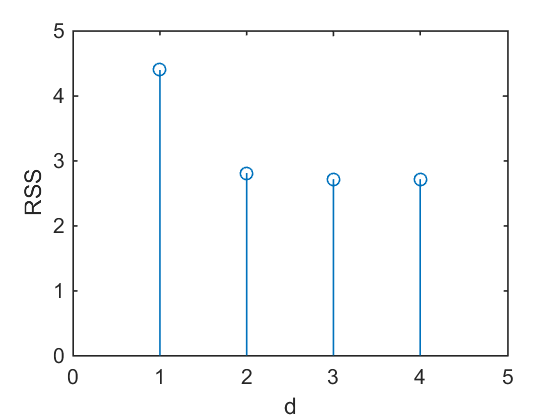

In [20]:
stem(RSS)
xlim([0 5])
xlabel('d')
ylabel('RSS')

If $d = 50$, See what is happening. Think about why. (numerical issue in computing matrix inverse)

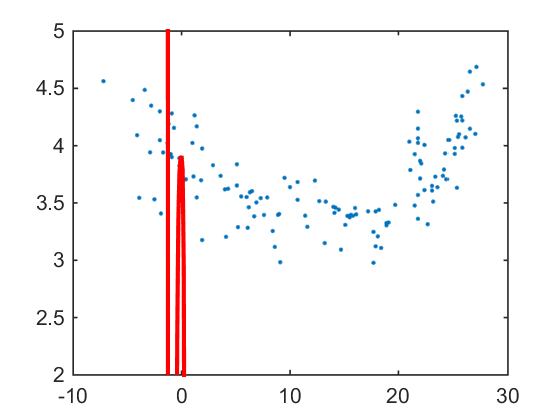

[Warning: Matrix is close to singular or badly scaled. Results may be inaccurate. RCOND = 3.768718e-144.] 
[  In pymat_eval at 35
  In matlabserver at 24]

In [21]:
d = 50;

Phi = [];
polybasis = [];

for i = 0:d
    Phi = [Phi x.^i];
    polybasis = [polybasis xp.^i];
end

theta = inv(Phi'*Phi)*Phi'*y;
yp = polybasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r','linewidth',2);  hold off

ylim([2 5])

Let's use CVX which utilizes the gradient descent method. (You do not need to know how CVX works inside)

- The below plot shows  __overfitting problems__

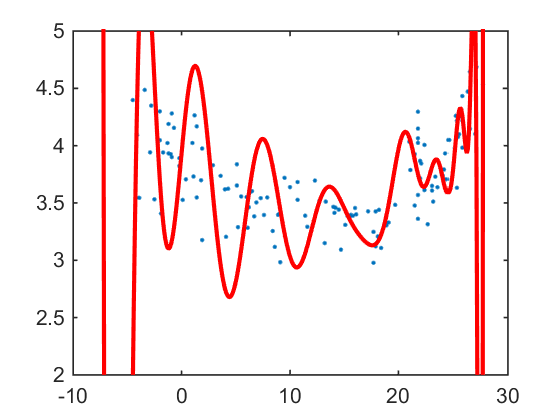

In [22]:
d = 50;

Phi = [];
polybasis = [];

for i = 0:d
    Phi = [Phi x.^i];
    polybasis = [polybasis xp.^i];
end

clear theta
cvx_begin quiet
    variable theta(d+1);
    minimize norm(Phi*theta-y,2)
cvx_end

yp = polybasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r','linewidth',2);  hold off
ylim([2 5])

## Use RBF function

- polynomial functions are not the only one
- Radial Basis Function (RBF) is also widely used
- RBF will be used to demonstrate how to overcome overfitting problems $\rightarrow$ regularization


Defined by bandwidth $\sigma$ and $k$ RBF centers $\mu_k \in \mathbb{R}^n$
$$ \phi_j(k) =  \exp \left( - \frac{\lVert x-\mu_j \rVert^2}{2\sigma^2}\right) $$

Linear Basis Function Models

Consider linear combinations of fixed nonlinear functions of the input variables, of the form

$$ \hat{y}=\sum{\theta_i \phi_i(x)} $$

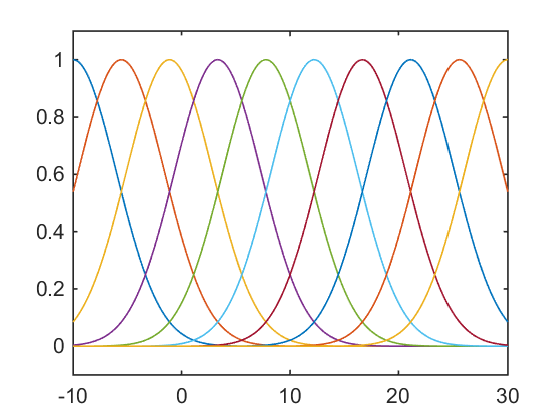

In [23]:
%% RBF basis
d = 10;
u = linspace(-10,30,d);

xp = (-10:0.1:30); xp = xp(:);

sigma = 4;

rbfbasis = [];
for j = 1:d
    rbfbasis = [rbfbasis exp(-(xp-u(j)).^2/(2*sigma^2))];
end

for i = 1:d
    plot(xp,rbfbasis(:,i)), hold on
end
hold off, ylim([-0.1 1.1])

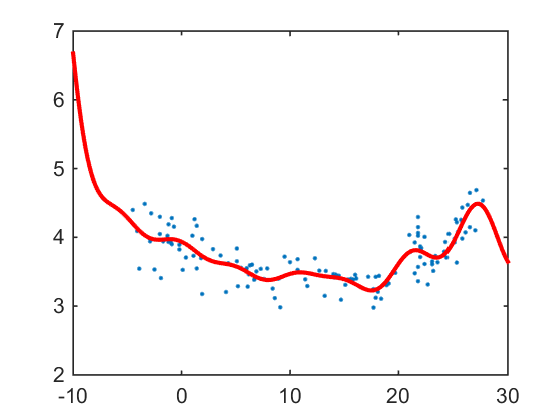

In [24]:
d = 50;
u = linspace(-10,30,d);
xp = (-10:0.1:30); xp = xp(:);

sigma = 4;

Phi = [];
rbfbasis = [];

for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xp-u(i)).^2/(2*sigma^2))];
end

clear theta
cvx_begin quiet
    variable theta(d);
    minimize norm(Phi*theta-y,2)
cvx_end

yp = rbfbasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r-','linewidth',2);  hold off
%ylim([2 5])

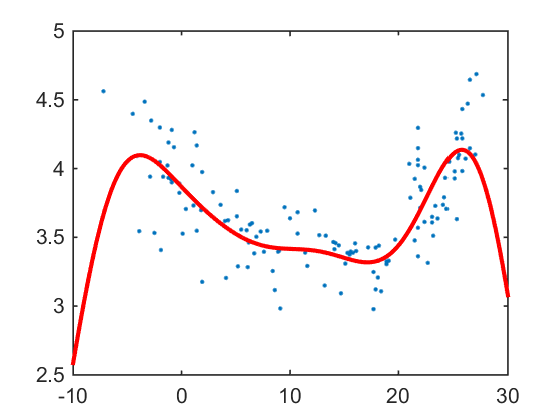

In [25]:
d = 50;
u = linspace(-10,30,d);
xp = (-10:0.1:30); xp = xp(:);

sigma = 4;

Phi = [];
rbfbasis = [];

for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xp-u(i)).^2/(2*sigma^2))];
end

clear theta
lambda = 2;
cvx_begin quiet
    variable theta(d);    
    minimize sum_square(Phi*theta-y) + lambda*sum_square(theta)
cvx_end

yp = rbfbasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r-','linewidth',2);  hold off
%ylim([2 5])

Regulization ( = ridge nonlinear regression) encourage small weights, but not exactly 0

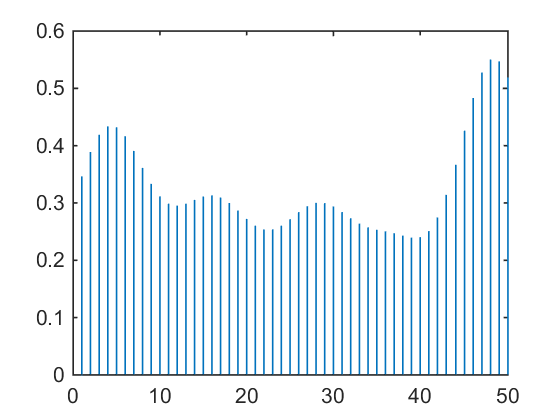

In [26]:
stem(theta,'marker','none')

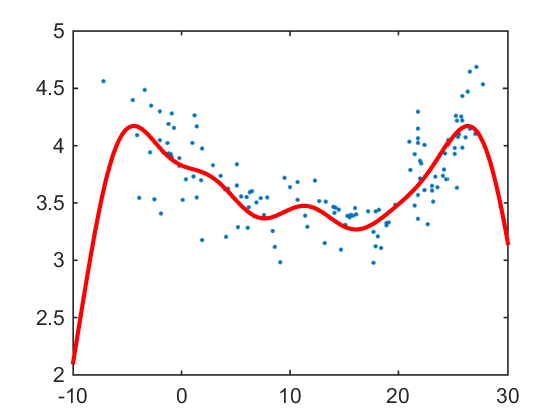

In [27]:
d = 50;
u = linspace(-10,30,d);
xp = (-10:0.1:30); xp = xp(:);

sigma = 4;

Phi = [];
rbfbasis = [];

for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xp-u(i)).^2/(2*sigma^2))];
end

clear theta
lambda = 2;
cvx_begin quiet
    variable theta(d);    
    minimize sum_square(Phi*theta-y) + lambda*norm(theta,1)  
cvx_end

yp = rbfbasis*theta;

plot(x,y,'.'), hold on
plot(xp,yp,'r-','linewidth',2);  hold off
%ylim([2 5])

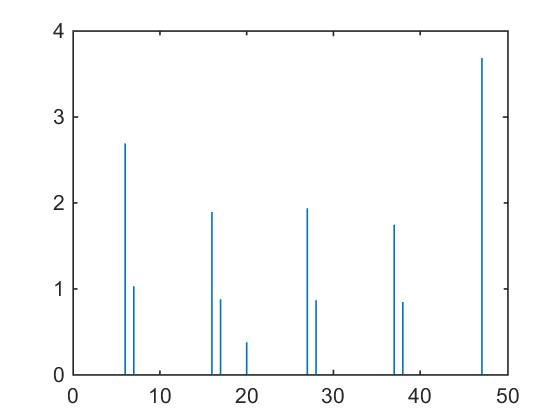

In [28]:
stem(theta,'marker','none')

In [29]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>